In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
#Citanje podataka
#Izbacivanje NaN vrednosti
#Izbacivanje svih redova u kojim je Landsize = 0
#Normalizovanje data frame-a tako da ne postoje rupe medju indeksima
data = pd.read_csv("housing_data.csv")
data = data.dropna(axis="rows", how = "any")
data = data[data.Landsize != 0.0]
data = data.reset_index(drop=True)

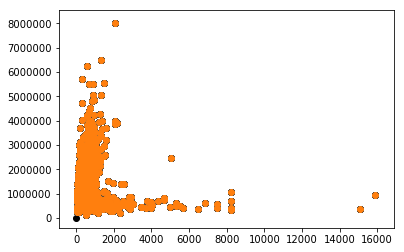

In [132]:
x_pocetno = data['Landsize']
y_pocetno = data['Price']
broj_redova = len(data)

In [112]:
#Uzimamo minimalnu i maksimalnu vrednost x i y koje su potrebne za pripremu podataka
z = np.sort(x)
x_max = z[broj_redova-1]
x_min = z[0]
z = np.sort(y)
y_max = z[broj_redova-1]
y_min = z[0]

In [113]:
#Funkcija priprema sluzi kako bi sve varijante gradijentog spusta mogle da zapocnu sa radom
# jer se uvek prvo poziva funkcija Grad a u njoj su potrebni podaci koji se 
# racunaju u funkciji f

def priprema(x, start, end):
    X = [0]*broj_redova
    Y = [0]*broj_redova
    a = x[0]
    b = x[1]

    for i in range(start, end -1):
        X[i] = (x_pocetno[i]-x_min) / (x_max-x_min)
        Y[i] = (y_pocetno[i]-y_min) / (y_max-y_min)
    Ypred = [0] * broj_redova
    for i in range(start, end - 1):
            Ypred[i] = a + b*X[i]

In [114]:
def f(x, start, end):
    #Ypred je nase predvidjanje nove cene kuce
    #SSE je niz kvadratnih gresaka
    #sse je ukupna kvadratna greska
    
    SSE = [0] * broj_redova
    sse = 0 
    a = x[0]
    b = x[1]
    for i in range(start, end - 1):
        Ypred[i] = 0
        Ypred[i] = a + b*X[i]
        SSE[i] = 0.5*(Y[i] - Ypred[i])**2
    for i in range(start, end -1):
        sse += SSE[i]
    #print sse
    return sse


In [115]:
def grad(x, lr, start, end):
    #updateA i updateB su gradijenti pomocu kojih menjamo vrednosti a i b u novim iteracijama
    #A i B su pomocni nizovi pomocu kojih dobijamo updateA i updateB
    A = [0]*broj_redova
    B = [0]*broj_redova
    updateA = 0
    updateB = 0  
    a = x[0]
    b = x[1]
    #print "a i b", a, b
    #A[i] i B[i] su u sustini izvodi funkcije po 'a' i po 'b'
    for i in range(start, end - 1):    
        A[i] = Ypred[i]-Y[i]
        B[i] = (Ypred[i]-Y[i])*X[i]        
    for i in range(start, end - 1):
        updateA += A[i]
        updateB += B[i]
    #print updateA, updateB
    #azuriranje a i b
    new_a = a - lr*updateA
    new_b = b - lr*updateB
    return np.array([new_a, new_b])

In [116]:
#Obican gradijenti spust, nalik onom s casa
def gradient_descent(f, grad, x, lr, eps, max_iterations, start, end):
    priprema(x, start, end)
    x_old = x
    for i in range(0, max_iterations):
        z = grad(x_old, lr, start, end)
        #print "old ",z
        x_new = x_old - lr*z
        #print "new ",x_new
        if np.abs(f(x_old, start, end)-f(x_new, start, end))<eps:
            break
        x_old = x_new
    print i
    return x_new

In [149]:
train_gradient = gradient_descent(f, grad,(0.4, 0.7), 0.0001, 0.001, 10000, 0, 2000)
test_gradient = gradient_descent(f, grad,train_gradient, 0.0001, 0.01, 10000, 2000, 3628)

9463
0


In [148]:
#Uvodjenje momentuma u gradinetni spust. 
#Koristimo konstantu 0.9, navnodno to je uobicajna vrednost koja se koristi
#Razlika ovog pristupa je sto uvodimo brzinu(eng. velocity)
#Brzinu dobijamo tako sto prethodnu vrednost brzine mnozimo sa momentumom
# i sabiramo sa korakom kao u obicnom gradijentom spustu
def gradient_descent_momentum(f, grad, x, lr, eps, max_iterations, start, end):
    priprema(x, start, end)
    x_old = x
    momentum = 0.9
    v_old = lr * grad(x, lr, start, end)
    for i in range(0, max_iterations):
        v_new = v_old * momentum + lr*grad(x_old, lr, start, end)
        x_new = x_old - v_new
        if np.abs(f(x_old, start, end)-f(x_new, start, end))<eps:
            break
        x_old = x_new
        v_old = v_new
    print i
    return x_new

In [76]:
train_momentum = gradient_descent_momentum(f, grad,(0.4, 0.7), 0.0001, 0.001, 10000, 0, 2000)
test_momentum = gradient_descent_momentum(f, grad,train_momentum, 0.0001, 0.01, 10000, 2000, 3628)

1106


array([ 0.144863  ,  0.23121872])

In [118]:
#Nestorovljev algoritam pored momentuma uvodi i
#to da nase trenutne koordinate a i b modifikujemo
#tako sto od njih oduzimamo staru brzinu pomnozemu sa momentumom
def gradient_descent_nestorov(f, grad, x, lr, eps, max_iterations, start, end):
    priprema(x, start, end)
    x_old = x
    momentum = 0.9   
    v_old = lr * grad(x,lr, start, end)
    for i in range(0, max_iterations):
        x_old = x_old - v_old * momentum
        v_new = v_old * momentum + lr*grad(x_old,lr, start, end)
        x_new = x_old - v_new
        if np.abs(f(x_old, start, end)-f(x_new, start, end))<eps:
            break
        x_old = x_new
        v_old = v_new
    print i
    
    return x_new

In [146]:
train_nestorov = gradient_descent_nestorov(f, grad,(0.2, 0.8), 0.0001, 0.0001, 10000, 0, 2000)
test_nestorov = gradient_descent_nestorov(f, grad, train_nestorov, 0.0001, 0.0001, 10000, 2000, 3628)

231
112


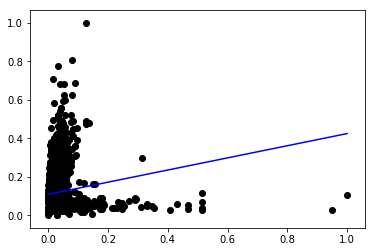

In [147]:
plt.scatter(X,Y, color = 'black')
plt.plot(test_nestorov, color = 'blue')
plt.xticks()
plt.yticks()
plt.show()

In [120]:
#Adagrad algoritam uvodi modifikuje korak ucenja
#To postizemo tako sto trenutni gradijent delimo konstantom fudge factor-om
#sa korenom historical_grad. Historical gradient je u sustini suma svih
#modifikacija gresaka koje smo smonjivali tokom rada
def gradient_descent_adagard(f, grad, x, lr, eps, max_iterations, fudge_factor, start, end):
    priprema(x, start, end)
    x_old = x
    historical_grad = 1
    adagard = 1
    for i in range(0, max_iterations):
        z = grad(x_old, lr, start, end)
        adjusted_grad = z / (fudge_factor + np.sqrt(historical_grad))
        #print "old ",z
        x_new = x_old - lr*adjusted_grad
        #print "new ",x_new
        if np.abs(f(x_old, start, end)-f(x_new, start, end))<eps:
            break
        x_old = x_new
        historical_grad += f(x_new, start, end)
    print i
    return x_new

In [121]:
train_adagrad = gradient_descent_adagard(f, grad,(0.4, 0.7), 0.0001, 0.0001, 10000, 0.000001, 0, 2000)
test_adagrad = gradient_descent_adagard(f, grad, train_adagrad, 0.0001, 0.0001, 10000, 0.000001, 2000, 3628)

484
423


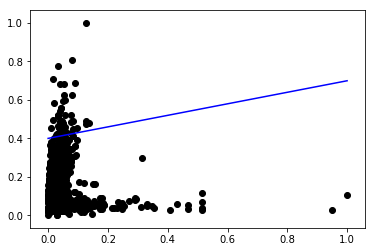

In [144]:
plt.scatter(X,Y, color = 'black')
plt.plot(test_adagrad, color = 'blue')
plt.xticks()
plt.yticks()
plt.show()